In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

#Importando o modelo machine learnig
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [4]:
# importar csv
data = pd.read_csv("nge_dados_input.csv")
data_semNF = pd.read_csv("nge_dados_input_semNF.csv")

In [5]:
data.head()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final
0,224323,0,0,1,0,87,140.0,116142,470,685,60.0,140
1,224325,0,0,1,0,82,122.0,108307,76,94,69.0,122
2,225392,0,0,3,0,41,70.0,41144,28,24,23.0,52
3,225392,0,0,3,0,41,70.0,62913,397,639,21.0,52
4,225531,0,0,2,0,36,48.0,37548,233,397,17.0,48


In [64]:
data.count()

id                  108
entidade            108
fornecedor          108
complexidade        108
stat_pagto          108
qtd_pag_word        108
qtd_pag_estimado    108
qtd_carc            108
qtd_tabela          108
qtd_image           108
qtd_estilos         108
pag_final           108
qtd_carc_normal     108
dtype: int64

In [6]:
#
# normalizar a quantidade de caracteres
#
data.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [7]:
#
# normalizar a quantidade de caracteres
#

# X["qtd_carc_normal"]=(X.qtd_carc-X.qtd_carc.min())/(X.qtd_carc.max()-X.qtd_carc.min())

In [8]:
data.dtypes
# baixa complexidade ==> 48 páginas 
# media complexidade ==> 49/64 páginas
# alta complexidade  ==> 65 acima

id                    int64
entidade              int64
fornecedor            int64
complexidade          int64
stat_pagto            int64
qtd_pag_word          int64
qtd_pag_estimado    float64
qtd_carc              int64
qtd_tabela            int64
qtd_image             int64
qtd_estilos         float64
pag_final             int64
qtd_carc_normal     float64
dtype: object

In [9]:
data.describe()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_pag_estimado,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,pag_final,qtd_carc_normal
count,108.000000,108.000000,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,230475.212963,0.268519,0.064815,1.444444,0.0,60.916667,93.759259,77540.694444,257.916667,340.768519,25.314815,78.518519,0.135330
std,22559.684178,0.573666,0.247347,0.631470,0.0,61.165644,68.238021,86924.309341,153.689098,203.278714,14.175567,61.064924,0.152117
min,3.000000,0.000000,0.000000,0.000000,0.0,12.000000,18.000000,209.000000,2.000000,2.000000,1.000000,18.000000,0.000000
25%,231018.250000,0.000000,0.000000,1.000000,0.0,31.750000,48.000000,29249.000000,127.500000,169.250000,17.750000,44.000000,0.050820
50%,233439.500000,0.000000,0.000000,1.000000,0.0,46.000000,75.000000,54855.000000,279.000000,337.500000,23.000000,68.000000,0.095630
75%,235307.000000,0.000000,0.000000,2.000000,0.0,73.750000,110.000000,98649.000000,387.500000,447.250000,28.250000,89.000000,0.172269
max,235831.000000,2.000000,1.000000,3.000000,0.0,543.000000,420.000000,571640.000000,526.000000,792.000000,71.000000,386.000000,1.000000


In [10]:
data.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_pag_estimado', 'qtd_carc', 'qtd_tabela',
       'qtd_image', 'qtd_estilos', 'pag_final', 'qtd_carc_normal'],
      dtype='object')

In [69]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos",'qtd_carc_normal']
colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']


colunas_y=['pag_final']
#colunas_y=['id',  'pag_final']

X = data[colunas_X]
y = data[colunas_y]

In [66]:
X.tail()

,complexidade,qtd_pag_word,qtd_carc,qtd_tabela,qtd_image
103,1,56,51127,356,365
104,2,38,40157,339,325
105,2,33,42499,293,303
106,2,33,28573,413,391
107,2,12,940,432,415


In [68]:
y.head()

,pag_final
0,140
1,122
2,52
3,52
4,48


# Normalizar?

In [16]:
# padronização/escalonamento dos dados.
#
# Escalas Diferentes Podem Ser um Problema? Normalizar?
# https://www.linkedin.com/pulse/pr%C3%A9-processamento-de-dados-intui%C3%A7%C3%A3o-e-pr%C3%A1tica-em-lucas-thiago-zane/
# https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa
#
#

In [17]:
# O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum,
# sem distorcer as diferenças nos intervalos de valores.
# Esse método é necessário apenas quando os parâmetros tiverem intervalos muito diferentes.

In [18]:
# a normalização não é necessária para a Regressão Logística.
# a normalização poderá fazer sentido no tratamento de outliers.
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas,
# como é o caso das regressões lineares multivariadas.
# random florest não envolvem o uso de distâncias euclidianas.

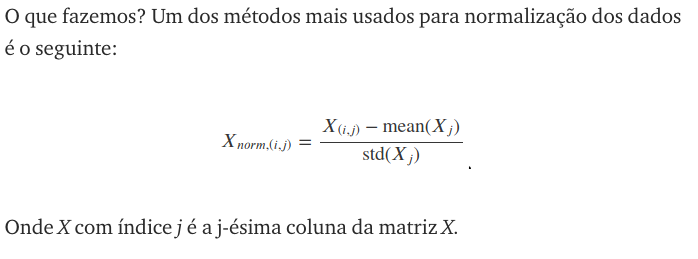

In [19]:
# O que essa fórmula está dizendo é que pra cada observação em ambas as variáveis,
# eu respondo a seguinte pergunta:quantos desvios padrões esse valor está longe da média? 

In [20]:
# “E se eu quiser modelar um classificador usando Regressão Logística, eu precisaria normalizar meus dados?”
# Tecnicamente falando, a normalização não é necessária para a Regressão Logística, 
# pois ela trata com probabilidades relacionadas as classes envolvidas, 
# se preocupa em desenhar um “fronteira” de decisão em torno de um limiar (o famoso threshold).
# Deixar variáveis com escalas similares é algo importante em algoritmos que trabalham com distâncias euclidianas, 
# como é o caso das regressões lineares multivariadas. 

In [21]:
# Os algoritmos de otimização:
#Adaptive Gradient (AdaGrad)
#Stochastic Gradient Descent (SGD)
#Gradiente Descendente com Momentum (momentum)
#Adaptative Delta Learning (adadelta)
#Nesterov Accelerated Gradient (nag)
#Otimizador RMSprop (rmsprop)


### normalização (StandardScaler)

from sklearn.preprocessing import StandardScaler

- sc_X = StandardScaler()
- X_train = sc_X.fit_transform(X_train)
- X_test = sc_X.transform(X_test)

- sc_y = StandardScaler()
- y_train = sc_y.fit_transform(y_train)

#### Uma maneira fácil de usar o Pandas : (aqui eu quero usar a normalização média)

- normalized_df=(df-df.mean())/df.std()
#### para usar a normalização min-max:

- normalized_df=(df-df.min())/(df.max()-df.min())

#### Você pode usar o pacote sklearn e seus utilitários de pré-processamento associados para normalizar os dados.

- import pandas as pd
- from sklearn import preprocessing

- x = df.values #returns a numpy array
- min_max_scaler = preprocessing.MinMaxScaler()
- x_scaled = min_max_scaler.fit_transform(x)
- df = pd.DataFrame(x_scaled)

In [22]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# RANDOM FOREST
########################################################

In [23]:
# instalar biblioteca scikit-learn
#! pip install -U scikit-learn

In [70]:
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image','qtd_carc_normal']
colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']


colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [71]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 4), (11, 4), (97, 1), (11, 1))

In [73]:
y_test.head()

,pag_final
77,108
10,40
4,48
83,54
62,46


In [74]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_train, y_train)

<ipython-input-74-957cc5138365>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [75]:
p = modelo.predict(X_test)

In [76]:
p

array([ 86,  48,  48,  52,  38, 110, 140, 120,  40,  48, 110])

In [77]:
print(p.shape,y_test.shape)

(11,) (11, 1)


In [78]:
y_test

,pag_final
77,108
10,40
4,48
83,54
62,46
67,176
30,100
45,76
95,44
11,46


In [79]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,p)))
# RMSE:  78.92781512242689
# RMSE:  78.58244078673046
# RMSE:  19.371957239079567
# RMSE:  53.665631459994955
# RMSE:  26.642413213111567 sem a feature quantidade de estilo
# RMSE:  28.926238482168273   ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']


RMSE:  28.926238482168273


In [34]:
##############################################################################################################

In [35]:
#########################################################
# FIM RANDOM FOREST
########################################################

In [36]:
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# Criando uma lista com os nomes dos atributos
#feature_cols = ['age','sex','bmi','children','smoker']

# Usando a lista para escolher um subconjunto do dataframe original
#X = data[feature_cols]

# Selecionando a Série no dataframe
#y = data.charges

# Dividindo entre conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Ajsutando o modelo (Aprendendo os coeficientes)
#linreg.fit(X_train, y_train)

# Fazendo predições no conjunto de teste
#y_pred = linreg.predict(X_test)

# Calculando RMSE para nossas predições
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [37]:
##############################################################################################################

In [38]:
#########################################################
# INÍCIO DA PARTE DE MACHINE LEARNIG  \
# LINEAR REGRESSION
########################################################

In [80]:
# prepara dados de entrada X e dados de saida Y
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', "qtd_carc_normal",'qtd_tabela','qtd_image']
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']
colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [82]:
# método train_test_split, Scikit-Learn 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1)

In [83]:
X_train

,qtd_pag_word,qtd_carc,qtd_tabela,qtd_image
2,41,41144,28,24
87,24,31123,11,12
102,49,56538,150,265
56,36,33348,207,387
95,32,29683,2,2
...,...,...,...,...
75,67,69135,76,147
9,18,145038,169,341
72,38,73461,140,224
12,57,1176,209,392


In [84]:
##### machine learnig

#Instanciando o estimador
linreg = LinearRegression()

#Ajustando o modelo ao conjunto de treino
linreg.fit(X_train, y_train)

#Interpretando os coeficientes do modelo
#Visualizando a interseção e os coeficientes 
print(linreg.intercept_)
print(linreg.coef_)


[17.64803011]
[[ 7.26208221e-01  2.58527218e-04  1.34929689e-02 -1.87755595e-02]]


In [85]:
colunas_X

['qtd_pag_word', 'qtd_carc', 'qtd_tabela', 'qtd_image']

In [86]:
X_train.columns

Index(['qtd_pag_word', 'qtd_carc', 'qtd_tabela', 'qtd_image'], dtype='object')

In [87]:
#Atributos e seus coeficientes
list(zip(colunas_X, linreg.coef_))

[('qtd_pag_word',
  array([ 7.26208221e-01,  2.58527218e-04,  1.34929689e-02, -1.87755595e-02]))]

In [88]:
#Fazendo predições no conjunto de teste
y_pred = linreg.predict(X_test)

In [89]:
y_pred

array([[ 35.94669235],
       [106.5160717 ],
       [ 44.873753  ],
       [ 71.09854189],
       [ 42.92934788],
       [ 31.69320459],
       [ 90.0979985 ],
       [ 64.00316719],
       [ 89.89084032],
       [ 32.00152368],
       [ 52.51876985]])

In [90]:
y_test

,pag_final
100,30
90,82
92,40
89,66
101,42
55,34
88,78
54,68
48,92
66,24


Comparando essas métricas:

- MAE é a mais fácil de entender.
- MSE é mais popular que MAE, porque MSE "pune" erros grandes.
- RMSE é ainda mais popular que MSE, porque RMSE é interpretável na mesma unidade de y.

In [91]:
#RMSE:  12.11799697428631 # primeiro test com columas
#colunas_X= ['entidade', 'fornecedor', 'complexidade', 'stat_pagto','qtd_pag_word', 'qtd_carc', 'qtd_tabela','qtd_image']

#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

#RMSE:  11.831745496309976
# colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_pag_estimado','qtd_carc','qtd_tabela','qtd_image']
# RMSE:  8.41739234335301

In [93]:
#Nós precisamos de uma métrica de avaliação para comparar nossas predições com os valores verdadeiros!

# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# incluido feature Quantidade de estilo, mas o resultado piorou. RMSE foi de 11.83 para 12.43
# RMSE:  12.051420343980208
# RMSE:  9.782602553564418 => melhorou quando retirou feature complexidade
# RMSE:  9.16223875809479 => melhorou quando retirou feature quantidade de estilos


RMSE:  9.16223875809478


In [51]:
#Como interpretar esse valor?
# numero menor de RMSE é melhor
# RMSE:  11.831745496309976
# RMSE:  12.43000991830557
# RMSE:  14.428565435305106


In [94]:
# Save Model Using Pickle
import pickle
# save the model to disk

filename = 'finalized_model.sav'
pickle.dump(linreg, open(filename, 'wb'))
 


In [ ]:
######## //////////// TESTE COM ARQUIVOS SEM NF

In [ ]:
######## //////////// TESTE COM ARQUIVOS SEM NF

In [ ]:
######## //////////// TESTE COM ARQUIVOS SEM NF

In [ ]:
# some time later...
 
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [117]:
data_semNF = pd.read_csv("nge_dados_input_semNF.csv")
data_semNF = data_semNF[['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word',  'qtd_carc', 'qtd_tabela','qtd_image', 'qtd_estilos','qtd_pag_estimado']]

In [118]:
data_semNF.head()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,qtd_pag_estimado
0,235832,0,0,1,0,34,70983,288,211,16.0,48
1,235876,0,0,1,0,30,23238,133,107,29.0,48
2,235878,0,0,0,0,68,87223,275,156,127.0,98
3,235880,0,0,1,0,26,17783,3,2,23.0,48
4,235881,0,0,1,0,23,14560,260,142,28.0,46


In [119]:
data_semNF.columns

Index(['id', 'entidade', 'fornecedor', 'complexidade', 'stat_pagto',
       'qtd_pag_word', 'qtd_carc', 'qtd_tabela', 'qtd_image', 'qtd_estilos',
       'qtd_pag_estimado'],
      dtype='object')

In [120]:
#
# normalizar a quantidade de caracteres
#
# data_semNF.loc[:,'qtd_carc_normal'] = pd.Series((data.qtd_carc-data.qtd_carc.min())/(data.qtd_carc.max()-data.qtd_carc.min()))

In [121]:
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image']
colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']

X_semNF= data_semNF[colunas_X]

In [122]:
#Fazendo predições no conjunto de teste
y_pred_semNF = linreg.predict(X_semNF)

In [123]:
print(y_pred_semNF)

[[ 60.61447913]
 [ 45.22751222]
 [ 90.36128783]
 [ 41.12976115]
 [ 38.95701794]
 [ 38.10393936]
 [ 36.21606215]
 [184.3159129 ]
 [ 97.29016309]
 [ 64.7001456 ]
 [ 72.16448812]
 [ 69.07228522]
 [117.67358607]
 [496.38130347]
 [441.12890291]
 [ 45.35802587]
 [ 43.54279698]]


In [124]:
print(data_semNF["qtd_pag_estimado"])

0      48
1      48
2      98
3      48
4      46
5      46
6      46
7     198
8     110
9      68
10     75
11     70
12    114
13    460
14    420
15     48
16     48
Name: qtd_pag_estimado, dtype: int64


In [133]:
#y_pred_semNF = pd.Series(y_pred_semNF,name=["qtd_pag_inferido"])

resultado_comparativo =  pd.concat([data_semNF["qtd_pag_word"], data_semNF["qtd_pag_estimado"], pd.Series(y_pred_semNF.T[0])], axis=1)
data_semNF_final =  pd.concat([data_semNF, pd.Series(y_pred_semNF.T[0])], axis=1)


In [139]:
data_semNF_final.rename(columns={0: 'QTD_PAG_INVERIDO'}, inplace = True)


In [141]:
data_semNF_final.head()

,id,entidade,fornecedor,complexidade,stat_pagto,qtd_pag_word,qtd_carc,qtd_tabela,qtd_image,qtd_estilos,qtd_pag_estimado,QTD_PAG_INVERIDO
0,235832,0,0,1,0,34,70983,288,211,16.0,48,60.614479
1,235876,0,0,1,0,30,23238,133,107,29.0,48,45.227512
2,235878,0,0,0,0,68,87223,275,156,127.0,98,90.361288
3,235880,0,0,1,0,26,17783,3,2,23.0,48,41.129761
4,235881,0,0,1,0,23,14560,260,142,28.0,46,38.957018


In [129]:
resultado_comparativo

,qtd_pag_word,qtd_pag_estimado,0
0,34,48,60.614479
1,30,48,45.227512
2,68,98,90.361288
3,26,48,41.129761
4,23,46,38.957018
5,22,46,38.103939
6,20,46,36.216062
7,142,198,184.315913
8,75,110,97.290163
9,38,68,64.700146


In [146]:
data_semNF_final.to_excel("resultado_inferência_NGE.xlsx",sheet_name='Inferencia por IA') 

In [147]:
!ls

NGE_fluxo1.ipynb               make_table.ipynb
Pre-processamento.MD           make_table_Job_SemNF.ipynb
Preparar_enviroment.MD         nge_dados_input.csv
__pycache__                    nge_dados_input_semNF.csv
finalized_model.sav            nolaks.ipynb
gerar_nova_tabela.ipynb        nolaks.py
get_file_word - cópia.py       resultado_inferência_NGE.xlsx
get_file_word.py               sheet.json
get_file_word_info.ipynb       teste.ipynb
ler_metadados_word.ipynb       teste_02.ipynb
ler_qtd_pag_word.ipynb         teste_03.ipynb
machine_learning_NGE.ipynb     teste_api_smartsheet.ipynb


In [ ]:
#########################################################
# FIM  LINEAR REGRESSION
########################################################

In [ ]:
################################################################################################################
#########################################################
# LOGISTIC REGRESSION
########################################################

In [101]:
#colunas_X= ['complexidade', 'qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image',"qtd_estilos"]
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image',"qtd_estilos", 'qtd_carc_normal']
#colunas_X= ['qtd_pag_word', 'qtd_tabela','qtd_image', 'qtd_carc_normal']
colunas_X= ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']



colunas_y=['pag_final']
X = data[colunas_X]
y = data[colunas_y]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10,random_state=1)

In [103]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
##### machine learnig
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_test.fillna(-1)))
print(clf.predict_proba(X_test.fillna(-1)))
print(clf.score(X_train, y_train))


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[ 48  66 340  66  48  48  66  48  66  48  76]
[[1.84212785e-002 4.70941423e-003 2.71069490e-030 1.53249244e-002
  2.76986248e-002 2.39589031e-002 1.68695539e-002 3.07428590e-002
  2.64301908e-002 2.10818861e-002 2.69784434e-002 3.43440221e-002
  8.67495712e-002 2.51572431e-002 2.59629887e-002 1.89328563e-002
  2.69174933e-002 3.36961070e-002 2.25918493e-002 2.58592177e-002
  2.69554581e-002 4.43865931e-002 1.76981342e-002 2.30642037e-002
  2.42393995e-002 2.04901071e-002 1.81280013e-002 2.22756679e-002
  2.43644764e-002 3.81543365e-002 2.39315836e-002 2.23702644e-002
  2.13659732e-002 1.72348124e-002 2.07628020e-002 1.20892122e-034
  1.71100352e-002 2.18423854e-002 2.33182259e-002 1.79931547e-002
  1.53291422e-002 1.42029877e-002 1.23548287e-002 4.31507565e-018]
 [2.34224625e-002 4.53869893e-006 9.57134812e-142 2.41643693e-003
  1.54013575e-002 8.58421120e-003 1.29100616e-002 2.29830964e-002
  1.19113928e-002 1.21323338e-002 1.93706104e-002 2.57789741e-002
  3.05262142e-002 2.73670351e

/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test.fillna(-1))
print(y_pred)
print(y_test)

[ 48  66 340  66  48  48  66  48  66  48  76]
     pag_final
100         30
90          82
92          40
89          66
101         42
55          34
88          78
54          68
48          92
66          24
58          52


/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wpessoa/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
# RMSE:  26.17424132789543
# quantidade de estilo é muito relevante nesse modelo, sem essa feature RMSE:  106.26211160915429
# RMSE:  92.03951720469163 Para essa features ['qtd_pag_word', 'qtd_carc','qtd_tabela','qtd_image']



RMSE:  92.03951720469163


In [ ]:
#########################################################
# FIM  LOGISTIC REGRESSION
########################################################

In [ ]:
#
# 
################################################################################################################

In [205]:
# codigos consultados de 
# https://github.com/WalnerPessoa/Medical-Cost-Personal/blob/master/Aula%205%20-%20Regress%C3%A3o%20linear%20para%20prever%20as%20despesas%20m%C3%A9dicas%20de%20um%20paciente%20.ipynb


# calculando a media de um exemplo
# Definindo os valores de resposta verdadeiros e preditos
true = [100,50,30,30]
pred = [90,50,50,30]
print("dados verdadeiros: ",true)
print("dados inferidos:", pred)
# Calculando erro médio absoluto na mão
print('erro médio absoluto: ',(10+0+20+0)/4)
# Calculando erro médio absoluto utilizando scikit-learn
from sklearn import metrics
print('erro médio absoluto: ',metrics.mean_absolute_error(true,pred)) 

#Calculando MSE na mão
print('MSE: ',(10**2+0+20**2+0)/4)
# Calculando MSE utilizando scikit-learn
print('MSE: ',metrics.mean_squared_error(true,pred))

# Calculando RMSE na mão
print('RMSE: ',np.sqrt((10**2+0+20**2+0)/4))
# Calculando RMSE utilizando scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(true,pred)))

dados verdadeiros:  [100, 50, 30, 30]
dados inferidos: [90, 50, 50, 30]
erro médio absoluto:  7.5
erro médio absoluto:  7.5
MSE:  125.0
MSE:  125.0
RMSE:  11.180339887498949
RMSE:  11.180339887498949
